# Graph Analysis
### Clique (forms a complete subgraph)
A **clique** is a subset of nodes of a graph that forms a complete subgraph. Specifically, A **clique** is a subset of nodes (vertices) in a graph such that every two distinct nodes of the clique are adjacent. 
- **Reminder:** A **complete graph** (or subgraph) is a graph in which every two distinct nodes are adjacent. 
<hr>

**Hint 1:** The **size of a clique** is defined by the number of nodes in the clique.
<br>**Hint 2:** A **maximal clique** is a clique that cannot be extended by including another adjacent node.
<br>**Hint 3:** The **maximum clique** is the largest clique in the graph (its size is the clique number $\omega(G)$).
<hr>

We may use the **Bron-Kerbosch** algorithm to find all the maximal cliques of an undirected graph. 
<hr>

In the following, we implement the **Bron-Kerbosch** algorithm in two versions: without **pivot** and with **pivot**, and test them with an example. 
- We also mention the available function **find_cliques** in *NetworkX* to find maximal cliques.
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import module to diplay graphs
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
# Define the Bron-Kerbosch algorithm to find maximal cliques
# in two version: without-pivot and with-pivot

# This is the original algorithm without pivot
def bron_kerbosch(graph, R, P, X, cliques):
    """
    R: Current clique candidate
    P: Nodes that can extend R
    X: Nodes already processed
    cliques: Result list
    """
    if not P and not X:
        cliques.append(R.copy())
        return
    P_copy=P.copy() # Iterate over copy
    for v in P_copy:
        neighbors_v = set(graph[v])
        bron_kerbosch(graph, R | {v}, P & neighbors_v, 
                      X & neighbors_v, cliques)
        P.remove(v) # Modify original P
        X.add(v)
        
#--------------------------------------------------

# This is the algorithm with pivoting
def bron_kerbosch_with_pivot(graph, R, P, X, cliques):
    """
    R: Current clique candidate
    P: Nodes that can extend R
    X: Nodes already processed
    cliques: Result list
    """
    if not P and not X:
        cliques.append(R.copy())
        return
    
    # Choose a pivot from {P ∪ X}, with most neighbors in P
    pivot = max(P | X , key=lambda v: len(set(graph[v]) & P))
    
    for v in P - set(graph[pivot]):
        neighbors_v = set(graph[v])
        bron_kerbosch_with_pivot(graph, R | {v}, P & neighbors_v, 
                                 X & neighbors_v, cliques)
        P.remove(v)
        X.add(v)

In [3]:
# Find maximal cliques by the Bron-Kerbosch algorithm
# Define an undirected graph
# Example graph represented as an adjacency list

graph={
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['A', 'B', 'D'],
    'D': ['A', 'C'],
    'E': ['B']
}
# Initialize the parameters and call the algorithm
all_nodes = set(graph.keys())
cliques = []
bron_kerbosch(graph, set(), all_nodes, set(), cliques)
print(f'The number of of maximal cliques (clique number): {len(cliques)}')
print('The cliques are:')
for clique in cliques:
    print(f'Clique {clique} with size {len(clique)}')

The number of of maximal cliques (clique number): 3
The cliques are:
Clique {'B', 'E'} with size 2
Clique {'B', 'C', 'A'} with size 3
Clique {'D', 'C', 'A'} with size 3


<hr style="height:3px; background-color:lightgreen">

### The following part of this Notebook finds the cliques by NetworkX

In [4]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

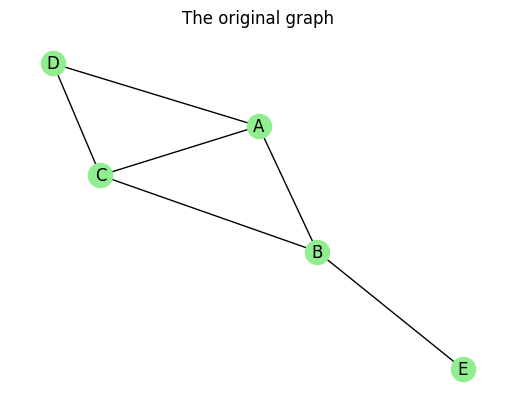

In [5]:
# convert graph into NetworkX style and display it
G_nx=convert_to_networkx(graph)
plt.title('The original graph')
nx.draw(G_nx,with_labels=True,node_color='lightgreen')

In the cell below, we find all the maximal cliques of the original graph by NetworkX function `find_cliques`:

All cliques: [['D', 'C', 'A'], ['B', 'E'], ['B', 'C', 'A']]
Maximum clique: ['D', 'C', 'A']
Clique number 3


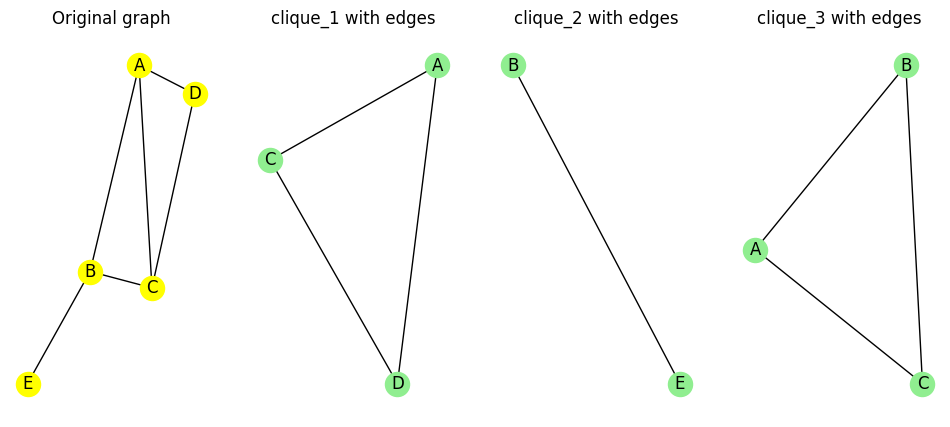

In [6]:
# Example of clique with NetworkX
# Find all cliques of the graph by NetworkX
cliques = list(nx.find_cliques(G_nx))
print("All cliques:", cliques)

# Find the maximum clique
max_clique = max(cliques, key=len)
# 2 maximum clique, here
print("Maximum clique:", max_clique) 

# Size of the largest clique
clique_number = len(max_clique) 
print(f'Clique number {clique_number}')

# Display the cliques
plt.figure(figsize=(12,5))
plt.subplot(1,4,1); plt.title('Original graph')
nx.draw(G_nx,with_labels=True,node_color='yellow')
for i,clique in enumerate(cliques,2):
    clique_subgraph = G_nx.subgraph(clique)
    plt.subplot(1,4,i); plt.title(f'clique_{i-1} with edges')
    nx.draw(clique_subgraph,with_labels=True,
            node_color='lightgreen')